<a href="https://colab.research.google.com/github/Shivam2Goyal/Network-Intrusion-Detector/blob/main/NID_using_NB_Combined_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combined Notebook: Comparison of Models

## Model 1 (Untitled8.ipynb)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.impute import SimpleImputer

In [35]:
# Define column names
columns = [
    "duration","protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label","difficulty_level"
]

In [36]:


# Load dataset from text file
filename = "KDDTrain+_20Percent.txt"
df = pd.read_csv(filename, names=columns)
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [37]:
df.duplicated().sum()
df = df.drop_duplicates()
df.shape

(25192, 43)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [39]:

# Convert categorical columns using Label Encoding
categorical_cols = ["protocol_type", "service", "flag"]
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])


# Convert labels to binary (0 for normal, 1 for attack)
df["label"] = df["label"].apply(lambda x: 0 if x == "normal" else 1)
df["duration"] = pd.to_numeric(df["duration"], errors="coerce")
df["dst_host_srv_rerror_rate"] = pd.to_numeric(df["dst_host_srv_rerror_rate"], errors="coerce")
# Avoid chained assignment by using df.loc
df.loc[:, "duration"] = df["duration"].fillna(df["duration"].median())
df.loc[:, "dst_host_srv_rerror_rate"] = df["dst_host_srv_rerror_rate"].fillna(df["dst_host_srv_rerror_rate"].median())





df["label"].value_counts()




,count
label,
0,13449
1,11743


In [40]:
# Convert dataframe to numpy array
X = df.drop("label", axis=1).values
y = df["label"].values

In [41]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

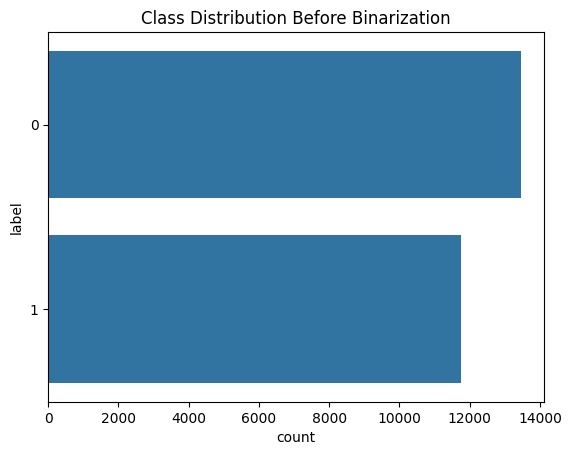

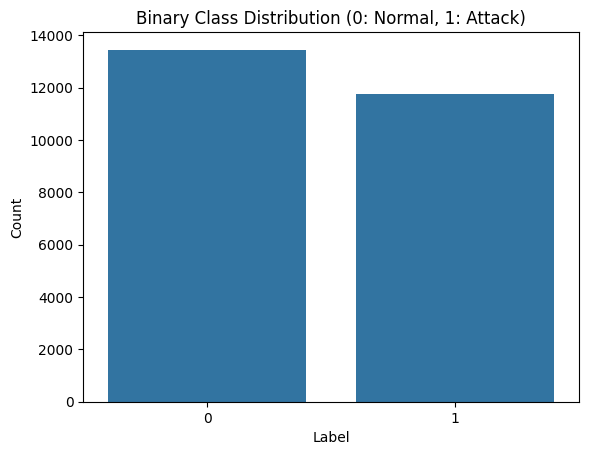

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before binarization (assuming original labels)
sns.countplot(y='label', data=df)
plt.title("Class Distribution Before Binarization")
plt.show()

# After binarization
sns.countplot(x=y)
plt.title("Binary Class Distribution (0: Normal, 1: Attack)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


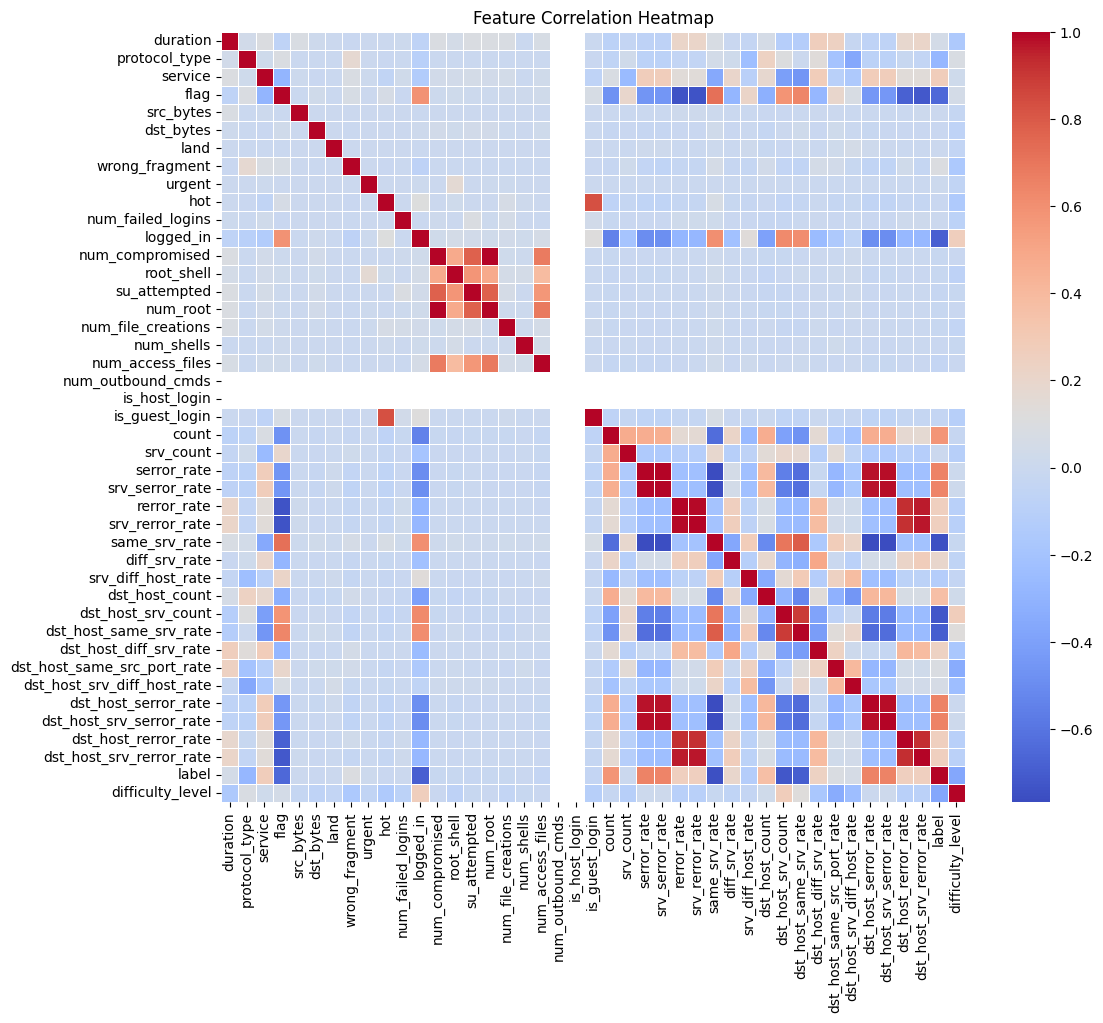

In [43]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


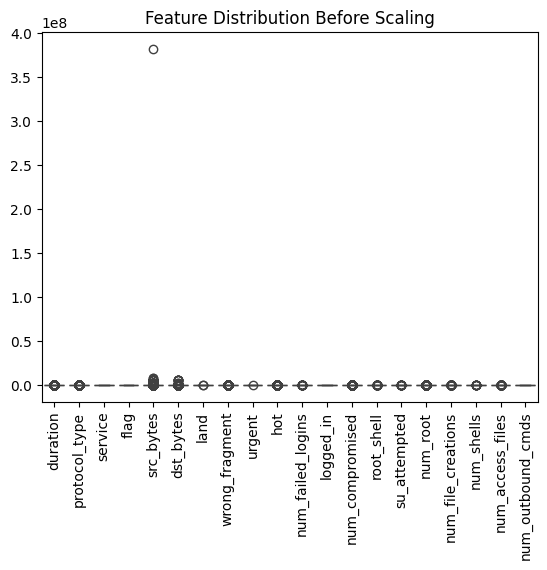

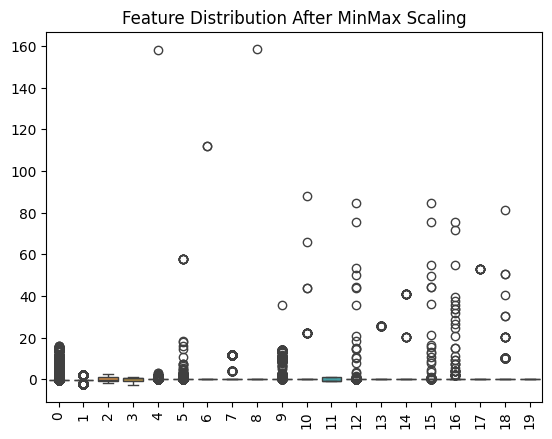

In [44]:
# Before scaling
sns.boxplot(data=df.drop("label", axis=1).iloc[:, :20])  # show first 10 features for simplicity
plt.title("Feature Distribution Before Scaling")
plt.xticks(rotation=90)
plt.show()

# After scaling
sns.boxplot(data=pd.DataFrame(X).iloc[:, :20])  # Convert X to DataFrame for iloc
plt.title("Feature Distribution After MinMax Scaling")
plt.xticks(rotation=90)
plt.show()

In [45]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# Before applying PCA, impute missing values
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent'
X = imputer.fit_transform(X)

# Now apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)



USING SKLEARN

In [46]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

nb = BernoulliNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid for BernoulliNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0]
}

# Initialize the classifier
bnb = BernoulliNB()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Get best model and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best estimator for prediction
best_bnb = grid_search.best_estimator_
y_pred = best_bnb.predict(X_test)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'alpha': 0.5, 'binarize': 1.0}
Best cross-validation accuracy: 0.9077060104291


In [48]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [49]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy using sklearn: {accuracy:.2f}%")

Model Accuracy using sklearn: 91.17%


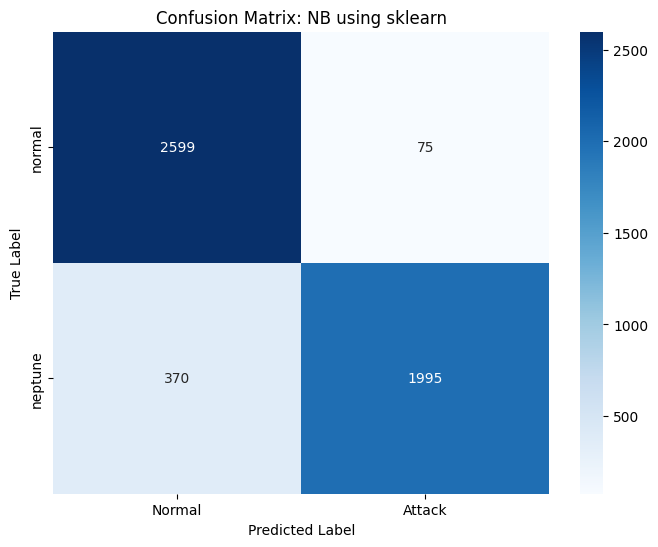

In [50]:
# Confuséion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["normal", "neptune"])
plt.title("Confusion Matrix: NB using sklearn")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




In [51]:
# Classification Report
report = classification_report(y_test, y_pred, target_names=["normal", "neptune"])
print(report)


              precision    recall  f1-score   support

      normal       0.88      0.97      0.92      2674
     neptune       0.96      0.84      0.90      2365

    accuracy                           0.91      5039
   macro avg       0.92      0.91      0.91      5039
weighted avg       0.92      0.91      0.91      5039



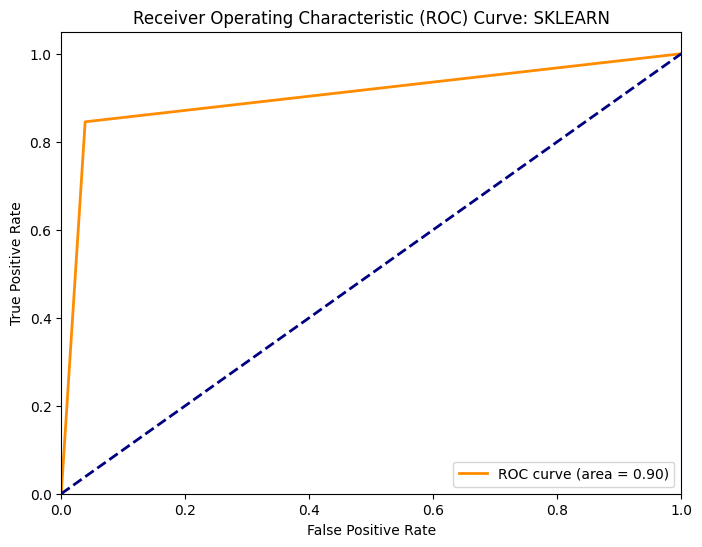

In [52]:
# ROC Curve
y_probs = nb.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: SKLEARN')
plt.legend(loc="lower right")
plt.show()

In [53]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for sk learn: {f1:.2f}")


F1 Score for sk learn: 0.90


## Model 2 (NID_NB.ipynb from scratch)

In [54]:
class NaiveBayes:
    def __init__(self, smoothing=1e-9):
        self.smoothing = smoothing
        self.classes = None
        self.class_priors = None
        self.means = None
        self.variances = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.means = {}
        self.variances = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = len(X_c) / len(y)
            self.means[c] = np.mean(X_c, axis=0)
            self.variances[c] = np.var(X_c, axis=0) + self.smoothing

    def _gaussian_pdf(self, x, mean, var):
        epsilon = 1e-9  # Ensure PDF is never zero
        var = np.maximum(var, 1e-9)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        pdf = (1 / np.sqrt(2 * np.pi * var)) * exponent
        return np.maximum(pdf, epsilon)

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                likelihoods = np.sum(np.log(self._gaussian_pdf(x, self.means[c], self.variances[c])))
                posteriors[c] = prior + likelihoods
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)


Naive Bayes from scratch

In [55]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [56]:
# Manual Hyperparameter Tuning for Custom Naive Bayes
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Range of smoothing values to try
smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_smoothing = None
best_score = 0

for smoothing in smoothing_values:
    scores = []
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]

        model = NaiveBayes(smoothing=smoothing)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)

    avg_score = np.mean(scores)
    print(f"Smoothing: {smoothing}, Avg CV Accuracy: {avg_score:.4f}")

    if avg_score > best_score:
        best_score = avg_score
        best_smoothing = smoothing

print(f"\nBest smoothing value: {best_smoothing} with accuracy: {best_score:.4f}")


Smoothing: 1e-09, Avg CV Accuracy: 0.8836
Smoothing: 1e-08, Avg CV Accuracy: 0.8843
Smoothing: 1e-07, Avg CV Accuracy: 0.8845
Smoothing: 1e-06, Avg CV Accuracy: 0.8839
Smoothing: 1e-05, Avg CV Accuracy: 0.8849

Best smoothing value: 1e-05 with accuracy: 0.8849


In [59]:
# Final model with best smoothing
best_model = NaiveBayes(smoothing=best_smoothing)
best_model.fit(X_train, y_train)
y_pred_custom = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))


[[2439  235]
 [ 313 2052]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2674
           1       0.90      0.87      0.88      2365

    accuracy                           0.89      5039
   macro avg       0.89      0.89      0.89      5039
weighted avg       0.89      0.89      0.89      5039



In [60]:
# Compute accuracy
# accuracy = np.mean(y_pred == y_test) * 100
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_custom) * 100
print(f"Model Accuracy: NB from scratch: {accuracy:.2f}%")

Model Accuracy: NB from scratch: 89.12%


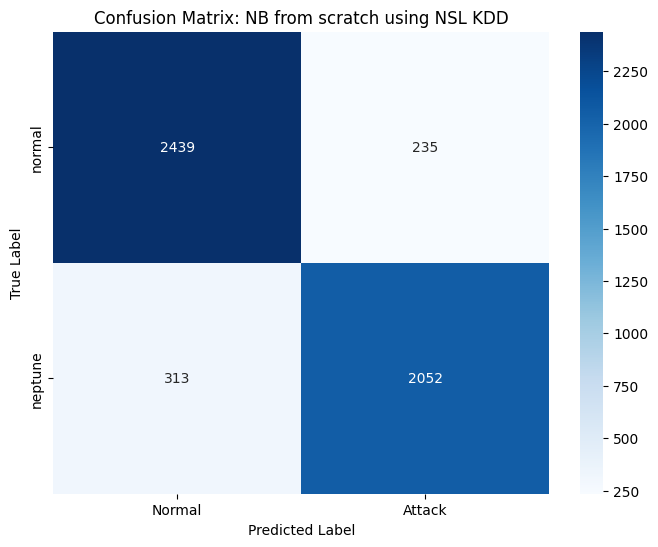

In [61]:
# Confuséion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["normal", "neptune"])
plt.title("Confusion Matrix: NB from scratch using NSL KDD")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()




In [62]:
# Classification Report
report = classification_report(y_test, y_pred_custom, target_names=["normal", "neptune"])
print(report)


              precision    recall  f1-score   support

      normal       0.89      0.91      0.90      2674
     neptune       0.90      0.87      0.88      2365

    accuracy                           0.89      5039
   macro avg       0.89      0.89      0.89      5039
weighted avg       0.89      0.89      0.89      5039



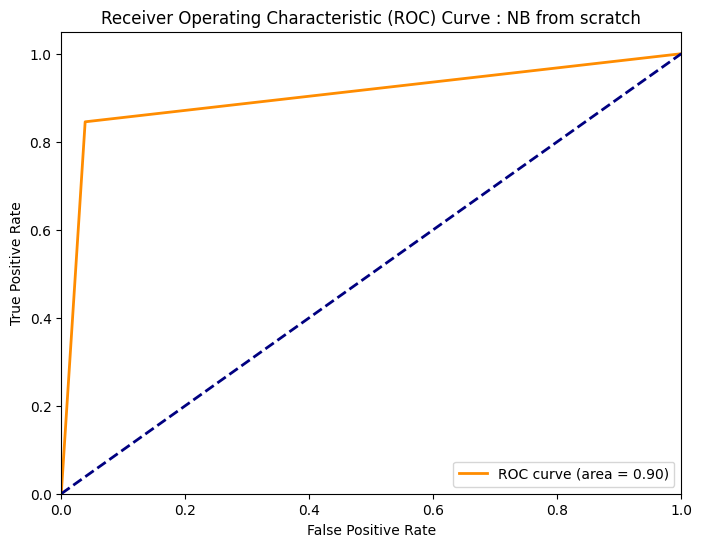

In [63]:
# ROC Curve
y_probs = nb.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve : NB from scratch')
plt.legend(loc="lower right")
plt.show()

In [64]:
f1 = f1_score(y_test, y_pred_custom)
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.88


USING KDD CUP DATASET

In [65]:
from urllib.request import urlretrieve

url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
filename = "kddcup.data_10_percent.gz"
urlretrieve(url, filename)

('kddcup.data_10_percent.gz', <http.client.HTTPMessage at 0x7a9e642d3c50>)

In [66]:
df= pd.read_csv(filename, names=columns)
df = df.drop("difficulty_level", axis=1)
df = df.drop_duplicates()
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [67]:
from sklearn.impute import SimpleImputer

df.duplicated().sum()
df = df.drop_duplicates()
df.shape
categorical_cols = ["protocol_type", "service", "flag"]
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
# Step 2: Check original labels
print(df["label"].value_counts())  # Should show normal. and other attack types

# Step 3: Convert to binary classification
#df["label"] = df["label"].apply(lambda x: 0 if x.strip() == "normal." else 1)

# Step 4: Check the new distribution
print(df["label"].value_counts())

# Convert labels to binary (0 for normal, 1 for attack)
df.loc[:, "label"] = df["label"].apply(lambda x: 0 if x == "normal" else 1) # Use .loc for assignment
df.loc[:, "duration"] = pd.to_numeric(df["duration"], errors="coerce") # Use .loc for assignment
df.loc[:, "dst_host_srv_rerror_rate"] = pd.to_numeric(df["dst_host_srv_rerror_rate"], errors="coerce") # Use .loc for assignment

# Avoid chained assignment by using df.loc
df.loc[:, "duration"] = df["duration"].fillna(df["duration"].median()) # Use .loc for assignment
df.loc[:, "dst_host_srv_rerror_rate"] = df["dst_host_srv_rerror_rate"].fillna(df["dst_host_srv_rerror_rate"].median()) # Use .loc for assignment

X = df.drop(["label", df.columns[41]], axis=1).values
# Convert dataframe to numpy array

y = df["label"].values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


label
normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: count, dtype: int64
label
normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20


In [68]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

In [69]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy using sklearn: {accuracy:.2f}%")

Model Accuracy using sklearn: 100.00%


In [70]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 1.00


In [71]:
# Define Naïve Bayes class
class NaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.means = None
        self.variances = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.means = {}
        self.variances = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_priors[c] = len(X_c) / len(y)
            self.means[c] = np.mean(X_c, axis=0)
            self.variances[c] = np.var(X_c, axis=0) + 1e-9  # Avoid zero variance

    def _gaussian_pdf(self, x, mean, var):
        epsilon = 1e-9  # Small value to prevent division by zero
        var = np.maximum(var, epsilon)  # Ensure variance is not too small
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        pdf = (1 / np.sqrt(2 * np.pi * var)) * exponent
        return np.maximum(pdf, epsilon)  # Ensure no zero values

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for c in self.classes:
                prior = np.log(self.class_priors[c])
                likelihoods = np.sum(np.log(self._gaussian_pdf(x, self.means[c], self.variances[c])))
                posteriors[c] = prior + likelihoods
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)


In [72]:
# Train the Naïve Bayes model
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy using sklearn: {accuracy:.2f}%")

Model Accuracy using sklearn: 100.00%


In [73]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


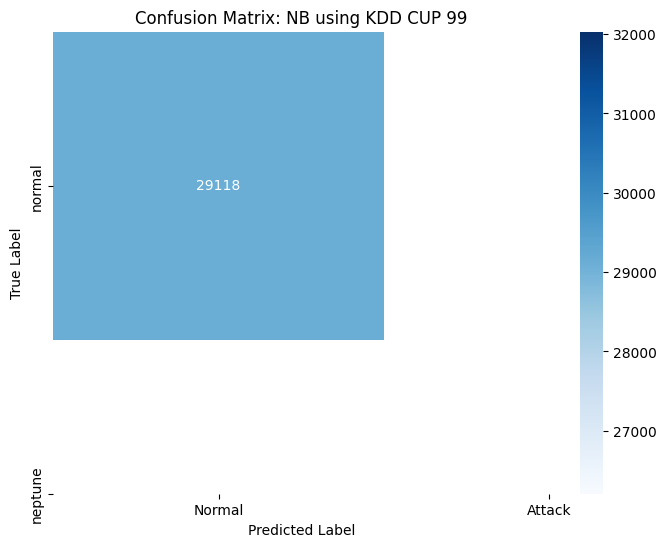

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"], yticklabels=["normal", "neptune"])
plt.title("Confusion Matrix: NB using KDD CUP 99")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [75]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(1): np.int64(145586)}


In [76]:
print(df["label"].value_counts())


label
1    145586
Name: count, dtype: int64
